### 导包

In [1]:
import numpy as np

import pandas as pd

from pandas import Series,DataFrame

# 画图
from pylab import mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False

### 读取数据

In [3]:
#读取[users.dat,movies.dat,ratings.dat]三个文件内容

# UserID::Gender::Age::Occupation::Zip-code
# MovieID::Title::Genres
# UserID::MovieID::Rating::Timestamp

users = pd.read_csv('../source/users.dat',sep='::',names=['UserID','Gender','Age','Occupation','Zip-code'],engine='python')
movies = pd.read_csv('../source/movies.dat',sep='::',names=['MovieID','Title','Genres'],engine='python')
ratings = pd.read_csv('../source/ratings.dat',sep='::',names=['UserID','MovieID','Rating','Timestamp'],engine='python')

#type(ratings)
#pandas.core.frame.DataFrame

In [4]:
display(users.head(),movies.head(),ratings.head())

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


### 数据集成

In [5]:
#数据分布在三个表中 根据表中的相同字段进行集合
movie_data = pd.merge(pd.merge(movies,ratings),users)
# movie_data.head()
#movie_data.shape
#(1000209, 10)

### 评分较高的电影

In [6]:
movie_rating_mean = pd.pivot_table(movie_data,values='Rating',index=['Title'],aggfunc='mean')
#movie_rating_mean.head()

In [7]:
#得出评分较高的电影
moive_high_rating = movie_rating_mean.sort_values(by='Rating',ascending=False)
#反之亦然
moive_low_rating =  movie_rating_mean.sort_values(by='Rating',ascending=True)
# moive_high_rating[::-1]
# moive_high_rating[-10:]

### 不同性别对电影的平均评分

In [8]:
movie_gender_rating_mean = pd.pivot_table(movie_data,values='Rating',index=['Title'],columns=['Gender'],aggfunc='mean')
# movie_gender_rating_mean = pd.pivot_table(movie_data,values='Rating',index=['Title','Gender'],aggfunc='mean')
movie_gender_rating_mean.head()


Gender,F,M
Title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


### 不同性别争议最大电影

In [9]:
movie_gender_rating_mean['diff'] = (movie_gender_rating_mean.F - movie_gender_rating_mean.M)
movie_gender_rating_mean.sort_values(by='diff',ascending=False,inplace=True)

In [10]:
#女性最喜欢的十大电影
f = movie_gender_rating_mean.head(10)
#男性最喜欢的十大电影
m = movie_gender_rating_mean.dropna()[-10:]

In [11]:
diff = pd.concat([f,m])
# diff.shape#(20, 3)
diff.head()

Gender,F,M,diff
Title,,,
"James Dean Story, The (1957)",4.000000,1.000000,3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,3.000000
Country Life (1994),5.000000,2.000000,3.000000
Babyfever (1994),3.666667,1.000000,2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,2.571429


matplotlib.axes._subplots.AxesSubplot

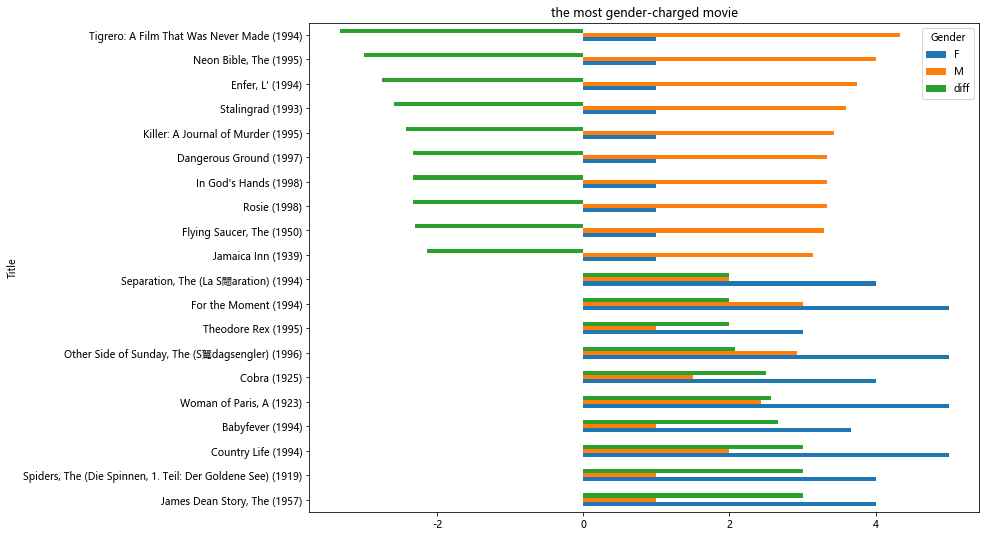

In [12]:
# 分析结果
# 数据可视化
# barh水平的柱状图
pic = diff.plot(y=['F','M','diff'],kind='barh',figsize=(12,9),title='the most gender-charged movie')
type(pic)#matplotlib.axes._subplots.AxesSubplot

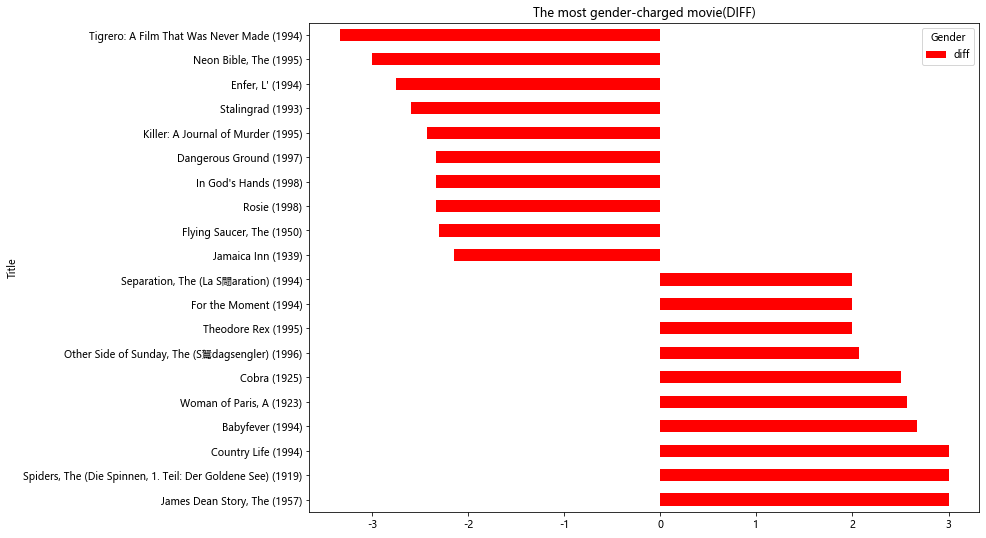

In [13]:
pic1 = diff.plot(y=['diff'],kind='barh',figsize=(12,9),title='The most gender-charged movie(DIFF)',color='red')

In [14]:
# matplotlib.matplotlib_fname()

### 评分次数最多 热门的电影

In [15]:
movie_hot_rating = movie_data.groupby(by='Title').size().sort_values(ascending=False)
# type(movie_hot_rating)#pandas.core.series.Series
# movie_hot_rating.head()

### 查看不同年龄段争议最大的电影

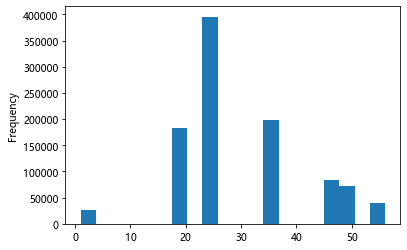

In [16]:
#查看年龄分布
movie_data['Age'].plot(kind='hist',bins=20)

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

In [17]:
movie_data['Age_range'] = pd.cut(movie_data.Age,bins=[0,17,24,34,44,49,55,100],right=True,labels=['Under 18','18-24','25-34','35-44','45-49','50-55','56+'])
movie_data.head()
#https://www.cnblogs.com/sench/p/10128216.html

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Age_range
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,Under 18
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,Under 18
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,Under 18
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,Under 18
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,Under 18


#### 每个年龄段用户评分人数和打分偏好

In [18]:
movie_data.groupby(by='Age_range').agg({'Rating':[np.size,np.mean]})

Rating          
             size      mean
Age_range                  
Under 18    27211  3.549520
18-24      183536  3.507573
25-34      395556  3.545235
35-44      199003  3.618162
45-49       83633  3.638062
50-55       72490  3.714512
56+         38780  3.766632

### 加入评分次数限制的分析不同性别对电影的平均评分

In [19]:
movie_gender_rating_mean.head()

Gender,F,M,diff
Title,,,
"James Dean Story, The (1957)",4.000000,1.000000,3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,3.000000
Country Life (1994),5.000000,2.000000,3.000000
Babyfever (1994),3.666667,1.000000,2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,2.571429


In [20]:
#评分次数最多的十大电影,获得索引
top_movie_title = movie_data.groupby(by='Title').size().sort_values(ascending=False)[:10].index
type(top_movie_title)

pandas.core.indexes.base.Index

In [21]:
# 标记选出的索引
flag = movie_gender_rating_mean.index.isin(top_movie_title)

In [22]:
movie_gender_rating_limit = movie_gender_rating_mean[flag].sort_values(by='diff',ascending=False)

#### 查看被评价过最多次的10部电影在不同年龄段之间的打分差异

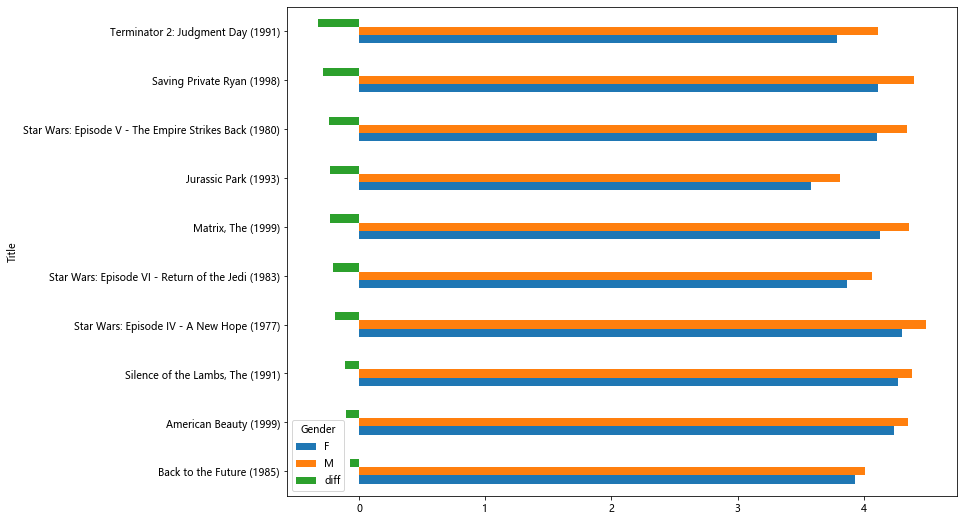

In [23]:
movie_gender_rating_limit.plot(kind='barh',figsize=(12,9))

### 加入评分次数限制的分析平均分高的电影

In [24]:
# 标记选出的索引
flag = movie_rating_mean.index.isin(top_movie_title)

In [25]:
movie_rating_mean_limit = movie_rating_mean[flag].sort_values(by='Rating',ascending=False)
movie_rating_mean_limit

,Rating
Title,
Star Wars: Episode IV - A New Hope (1977),4.453694
"Silence of the Lambs, The (1991)",4.351823
Saving Private Ryan (1998),4.337354
American Beauty (1999),4.317386
"Matrix, The (1999)",4.315830
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977
Terminator 2: Judgment Day (1991),4.058513
Star Wars: Episode VI - Return of the Jedi (1983),4.022893
Back to the Future (1985),3.990321


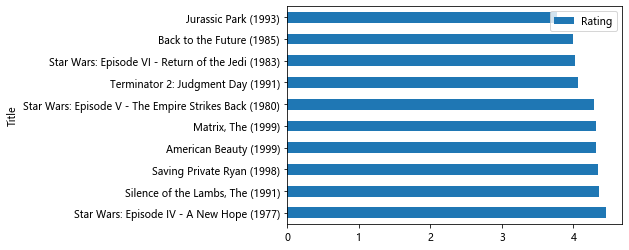

In [26]:
movie_rating_mean_limit.plot(kind='barh')